# 2.Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Importing CSV File

In [6]:
company=pd.read_csv("Company_Data.csv")

# Converting sales data into 3 categories Low, High, Medium by Making sales columns

In [7]:
bins = np.linspace(min(company['Sales']), max(company['Sales']),4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [8]:
label_names = ['Low', 'Medium', 'High']

In [9]:
company['Sales_bin'] = pd.cut(company['Sales'], bins, labels=label_names, include_lowest=True )
company[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low
5,10.81,Medium
6,6.63,Medium
7,11.85,High
8,6.54,Medium
9,4.69,Low


In [10]:
company.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium


# EDA

In [11]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [12]:
company["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [13]:
company["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [14]:
company["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [15]:
company.shape

(400, 12)

In [16]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [17]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_bin    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [18]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales_bin      0
dtype: int64

# Feature Engineering

In [19]:

company=company.drop(("Sales"),axis=1)

In [20]:
company.head(4)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium


# Using label Encoding

In [21]:
company.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium


In [22]:
label_encoder = preprocessing.LabelEncoder()

In [23]:
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US']) 
company['Sales_bin']=label_encoder.fit_transform(company['Sales_bin'])

In [24]:
company.head(4)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2


In [25]:
company.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [26]:
company.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [27]:
company.US.value_counts()

1    258
0    142
Name: US, dtype: int64

# Splitting Trai-Test Data

In [28]:
X=company.iloc[:,0:-1]
y=company.iloc[:,-1]

In [29]:
X.shape

(400, 10)

In [30]:
y.shape

(400,)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [32]:
X_train.shape

(268, 10)

In [33]:
y_train.shape

(268,)

In [34]:
X_test.shape

(132, 10)

In [35]:
y_train.shape

(268,)

# Building Decision Tree Classifier using "gini" Criteria

In [36]:
first_model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
first_model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [37]:
pred_first=first_model.predict(X_test)

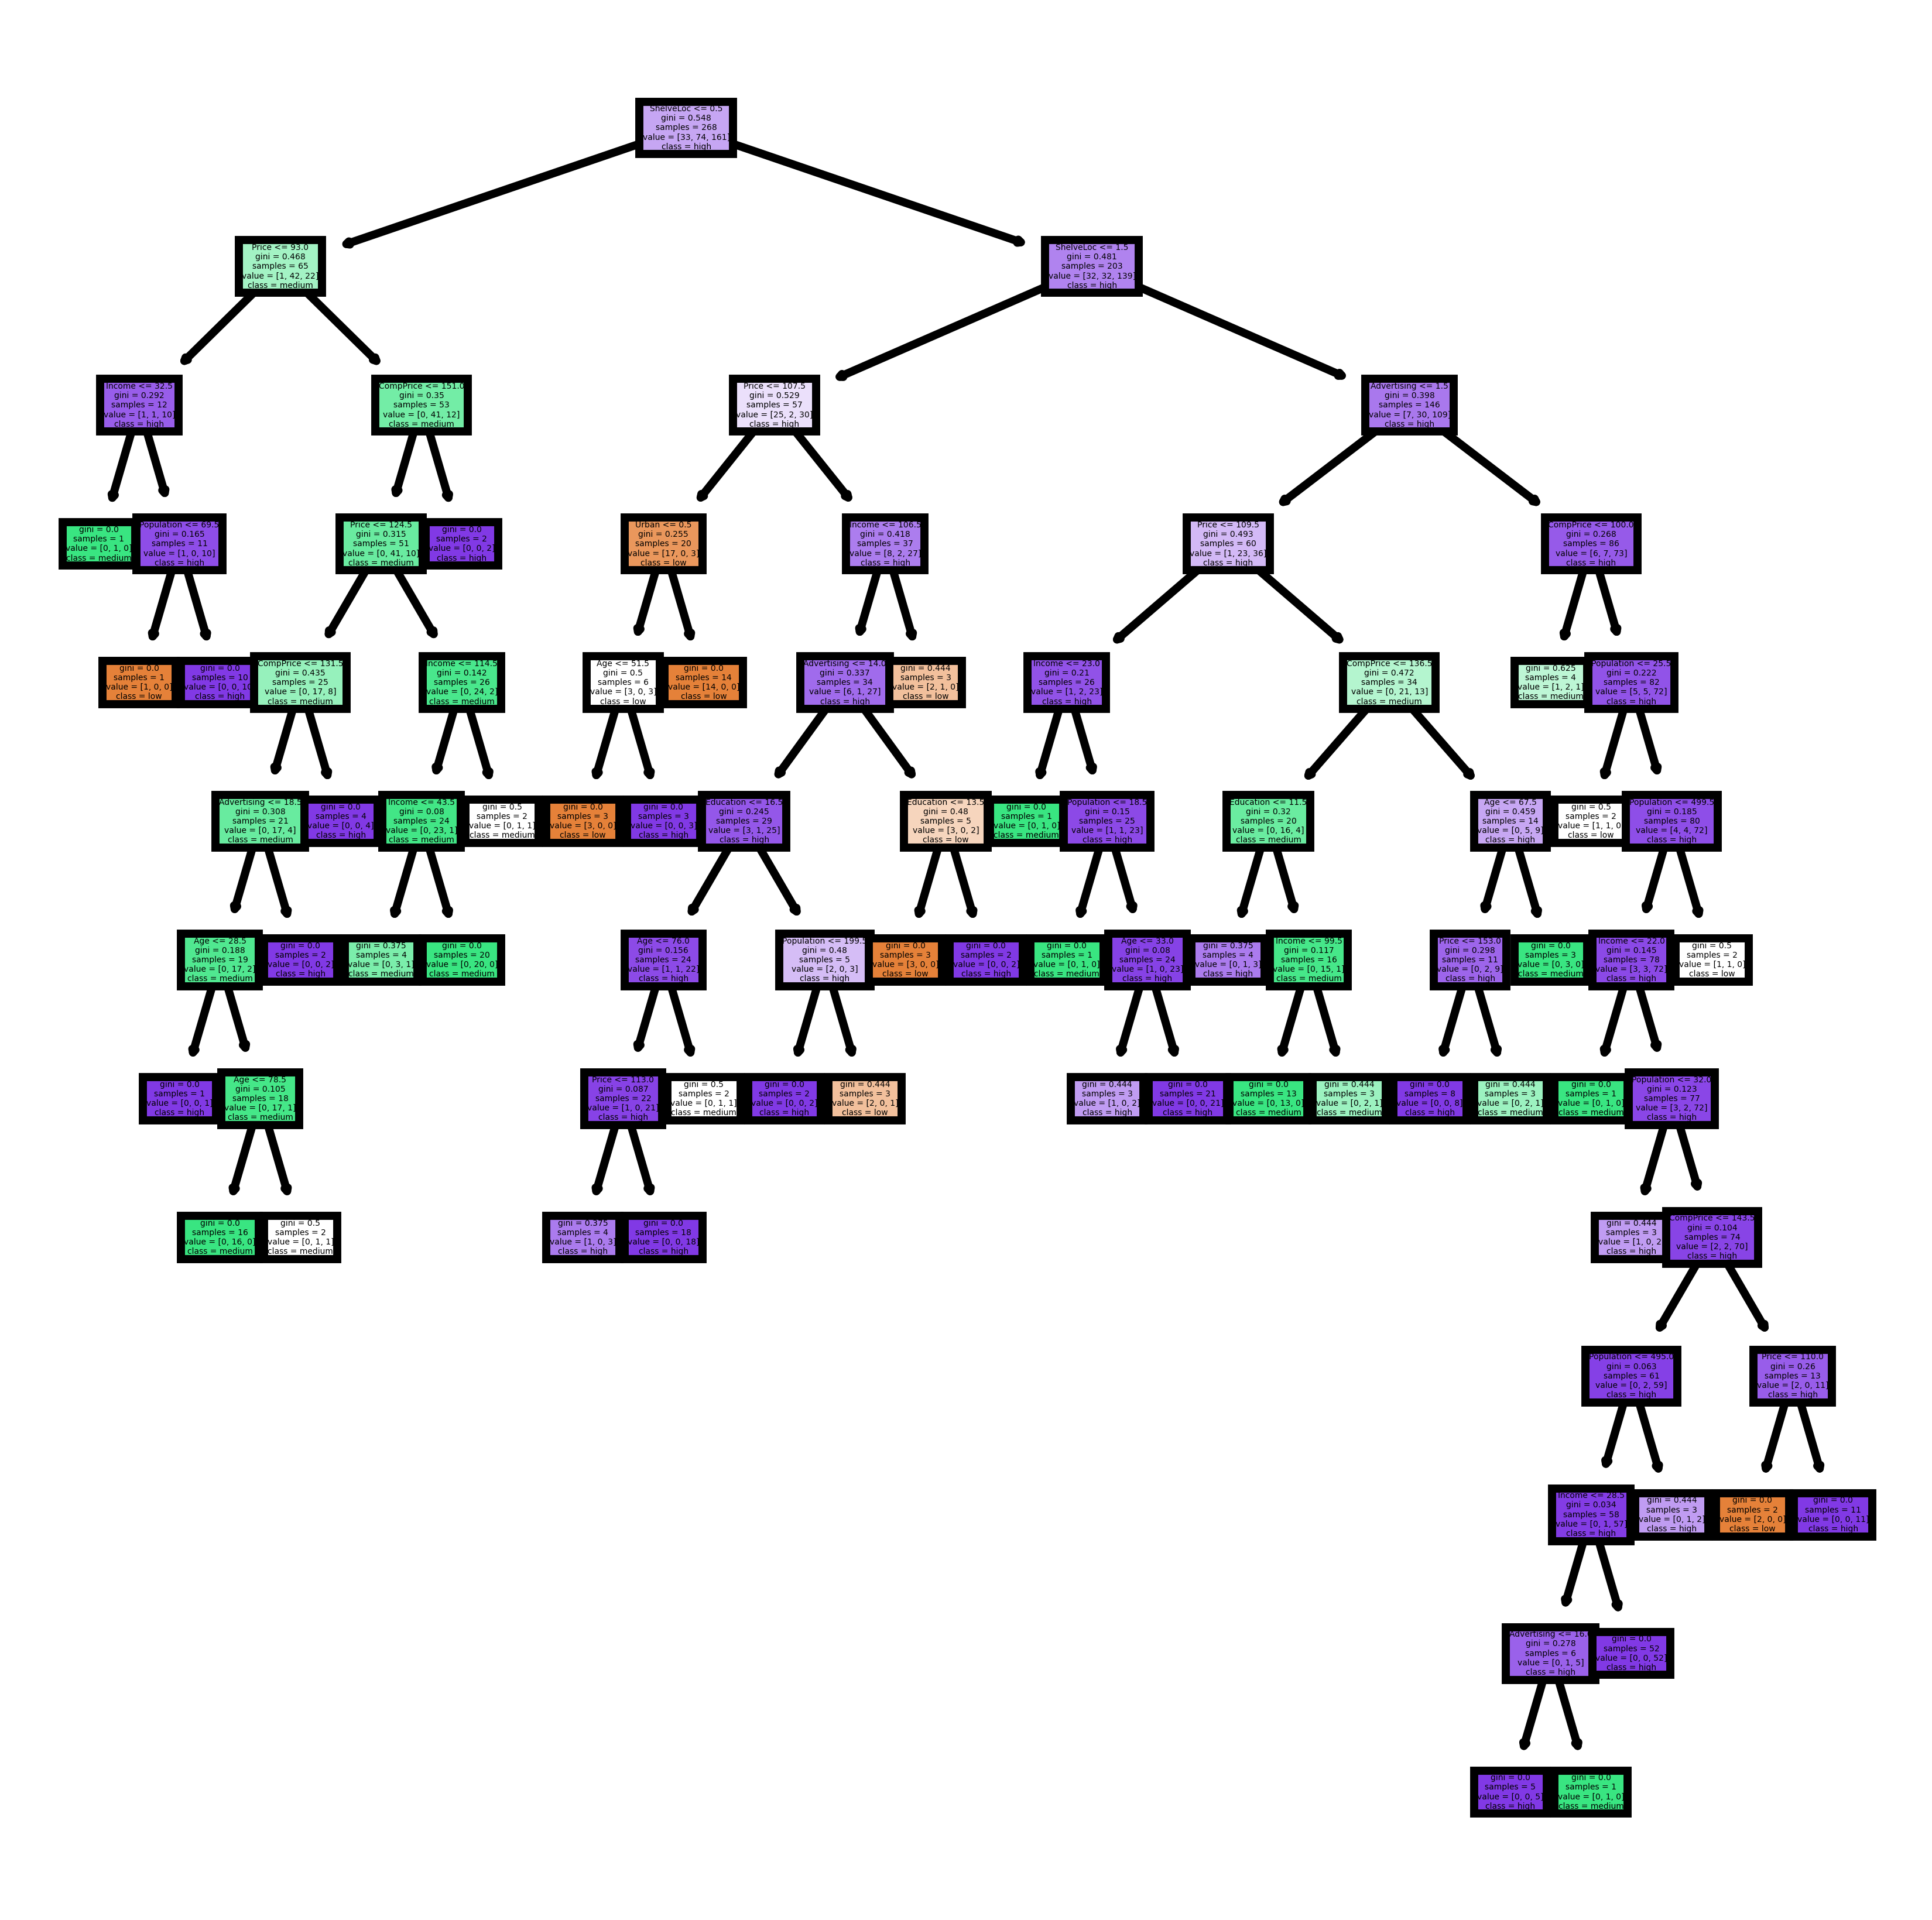

In [38]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(first_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [39]:
accuracy_score(pred_first,y_test)

0.5984848484848485

# Inference
The accuracy score, which is a statistic frequently used to assess the effectiveness of a classification model, has an output value of 0.59848484848485. The accuracy score calculates the model's percentage of accurate predictions out of all forecasts.

In this scenario, the model's predictions matched the true labels for almost 59.8% of the test samples, according to the accuracy score of about 0.598. Given that the model accurately predicted the class labels for little under 60% of the test examples, it is implied that the model's performance is moderate.


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_first)) 

              precision    recall  f1-score   support

           0       0.38      0.28      0.32        18
           1       0.42      0.57      0.48        28
           2       0.72      0.67      0.69        86

    accuracy                           0.60       132
   macro avg       0.51      0.51      0.50       132
weighted avg       0.61      0.60      0.60       132



# inference
The classification report you provided evaluates the performance of a classification model on a dataset. The report includes precision, recall, F1-score, and support for each class, as well as overall accuracy, macro average, and weighted average scores.

Looking at the precision scores, class 2 has the highest precision at 0.72, followed by class 1 at 0.42, and class 0 at 0.38. Precision measures the proportion of correctly predicted instances for a given class out of all instances predicted as that class. A higher precision indicates fewer false positives.

Examining the recall scores, class 1 has the highest recall at 0.57, followed by class 2 at 0.67, and class 0 at 0.28. Recall represents the proportion of correctly predicted instances for a given class out of all instances that belong to that class in the ground truth. Higher recall indicates fewer false negatives.

The F1-scores provide a balance between precision and recall. Class 2 has the highest F1-score at 0.69, followed by class 1 at 0.48, and class 0 at 0.32. F1-score considers both precision and recall and is useful when finding a balance between them.

The support values indicate the number of instances in each class. Class 2 has the highest support with 86 instances, followed by class 1 with 28 instances, and class 0 with 18 instances.

The overall accuracy of the model is 0.60, meaning that approximately 60% of the test instances were correctly predicted.

In terms of the macro average, which calculates the average of precision, recall, and F1-score across all classes, the scores are around 0.51. The weighted average, which takes into account the support for each class, yields scores around 0.61.

In summary, the classification report provides a detailed evaluation of the model's performance, indicating strengths and weaknesses for each class. The report helps assess the model's ability to classify instances correctly and provides insights into precision, recall, and F1-score for different classes, as well as overall accuracy.

In [41]:
print(confusion_matrix(y_test,pred_first))

[[ 5  0 13]
 [ 2 16 10]
 [ 6 22 58]]


# Inference
The model's performance is broken down in great depth in the confusion matrix, which also shows where it excels (true positives, true negatives) and where it falls short (false positives, false negatives). The classes that the model confuses the most can be determined by looking at the confusion matrix, which also reveals possible areas for classification task improvement.


# Building Decision Tree Classifier using "entropy" Criteria

In [42]:
second_model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=2)

In [43]:
second_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [44]:
pred_second=second_model.predict(X_test)

In [45]:
pred_second

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1])

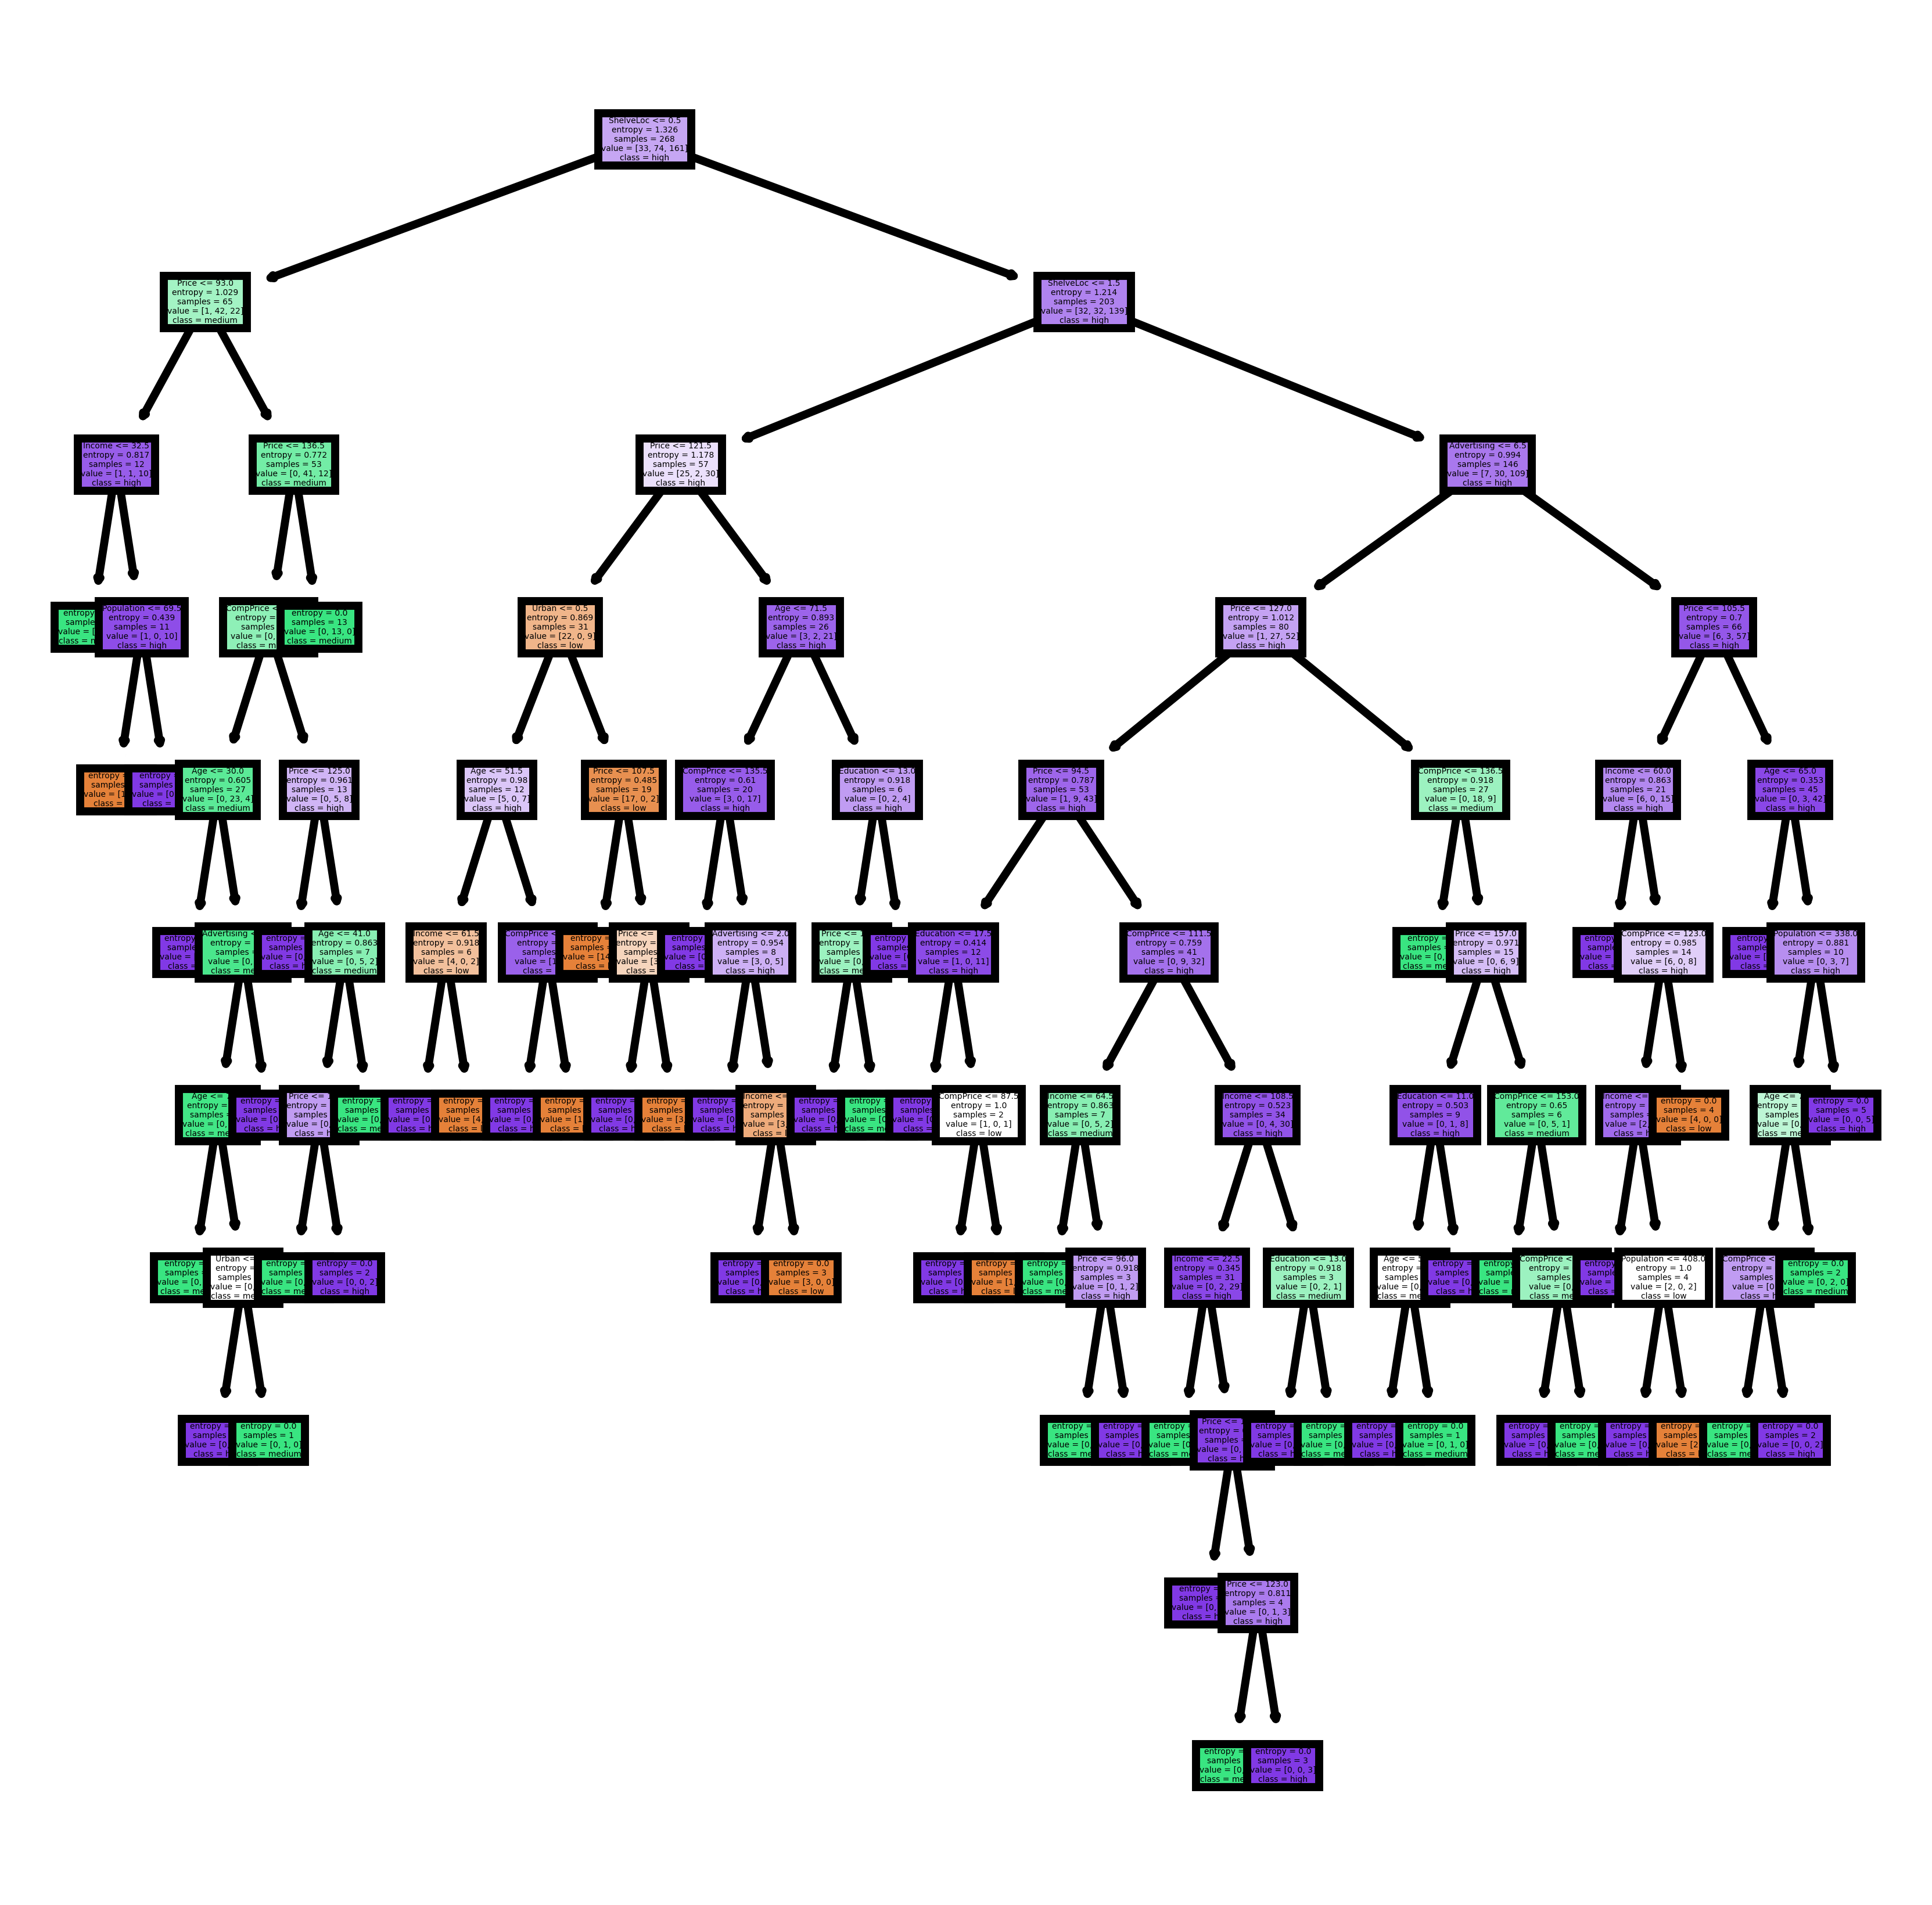

In [46]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(second_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [47]:
accuracy_score(pred_second,y_test)

0.6212121212121212

# Inference
A standard criterion for assessing a classification model's performance is accuracy. Out of all the instances, it calculates the percentage of instances that were accurately anticipated.

In this instance, an accuracy score of 0.621 indicates that for roughly 62.1% of the test instances, the model's predictions matched the real labels. The fact that the model's predictions were accurate for just over 60% of the test samples suggests a reasonable level of competence.


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_second)) 

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        18
           1       0.45      0.64      0.53        28
           2       0.72      0.67      0.70        86

    accuracy                           0.62       132
   macro avg       0.56      0.55      0.54       132
weighted avg       0.64      0.62      0.62       132



# inference
Precision: For class 0, the precision is 0.50, indicating that 50% of the instances predicted as class 0 were actually in class 0. For class 1, the precision is 0.45, suggesting that 45% of the instances predicted as class 1 were actually in class 1. For class 2, the precision is 0.72, indicating that 72% of the instances predicted as class 2 were actually in class 2. Higher precision values imply fewer false positives.

Recall: The recall for class 0 is 0.33, indicating that only 33% of the instances belonging to class 0 were correctly identified. For class 1, the recall is 0.64, suggesting that 64% of the instances belonging to class 1 were correctly identified. For class 2, the recall is 0.67, indicating that 67% of the instances belonging to class 2 were correctly identified. Higher recall values imply fewer false negatives.

F1-score: The F1-score for class 0 is 0.40, representing the harmonic mean of precision and recall for class 0. For class 1, the F1-score is 0.53, and for class 2, it is 0.70. The F1-score provides a balance between precision and recall and is useful when seeking a trade-off between them.

Support: It represents the number of instances in each class in the ground truth. For class 0, there are 18 instances; for class 1, there are 28 instances; and for class 2, there are 86 instances.

Accuracy: The overall accuracy is 0.62, indicating that approximately 62% of the test instances were correctly predicted.

Macro average: The macro average precision, recall, and F1-score are around 0.56, suggesting the average performance across all classes.

Weighted average: The weighted average precision, recall, and F1-score are around 0.64, indicating the average performance weighted by the support for each class.

In summary, the classification report provides a detailed evaluation of the model's performance, offering insights into precision, recall, F1-score, and support for each class, as well as overall accuracy. It helps to assess the model's ability to classify instances correctly and provides a comprehensive overview of the classification performance.

In [49]:
print(confusion_matrix(y_test,pred_second))

[[ 6  0 12]
 [ 0 18 10]
 [ 6 22 58]]


# inference
The confusion matrix is a tabular representation that summarizes the performance of a classification model by counting the number of true positives, true negatives, false positives, and false negatives for each class.

Analyzing the confusion matrix you provided:

Class 0: There are 6 instances correctly classified as class 0 (true negatives), indicating accurate predictions. However, there are 12 instances incorrectly classified as class 2 (false negatives), and no instances were wrongly classified as class 1 (false positives).

Class 1: There are 18 instances correctly classified as class 1 (true positives), suggesting accurate identification. However, there are 10 instances incorrectly classified as class 2 (false negatives), and no instances were wrongly classified as class 0 (false positives).

Class 2: There are 58 instances correctly classified as class 2 (true positives), indicating accurate predictions. However, there are 6 instances incorrectly classified as class 0 (false negatives), and 22 instances were wrongly classified as class 1 (false negatives).

The confusion matrix provides valuable insights into the model's performance for each class, highlighting true positives, true negatives, false positives, and false negatives. It helps assess the model's ability to classify instances correctly and identify areas where it may struggle or excel in classification tasks.

# From both Criteria  "entropy", gives maximum accuracy